In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = './anime/train'
data_test_path = './anime/test'
data_val_path = './anime/val'

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False, 
   
)


Found 150 files belonging to 9 classes.


In [5]:
data_cat=data_train.class_names

In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False, 
   
)


Found 150 files belonging to 9 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False, 
   
)


Found 150 files belonging to 9 classes.


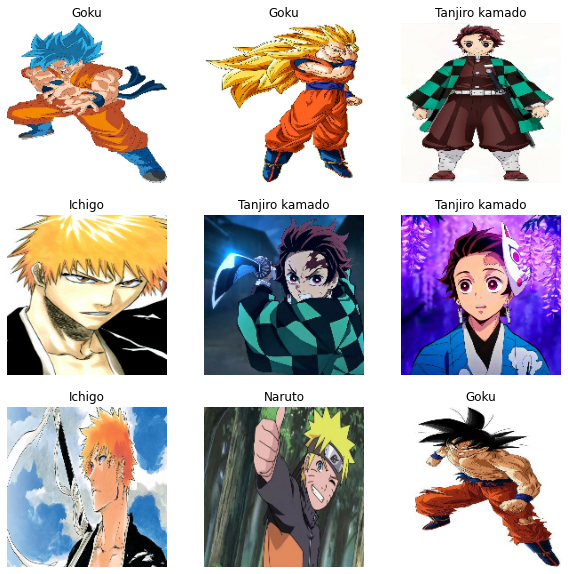

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Rescaling(1./255),  # Normalize pixel values to [0,1]
    layers.Conv2D(16, 3, padding='same', activation='relu'),  # 16 filters, 3x3 kernel size
    layers.MaxPooling2D(),  # Max pooling layer
    layers.Conv2D(32, 3, padding='same', activation='relu'),  # 32 filters, 3x3 kernel size
    layers.MaxPooling2D(),  # Max pooling layer
    layers.Conv2D(64, 3, padding='same', activation='relu'),  # 64 filters, 3x3 kernel size
    layers.MaxPooling2D(),  # Max pooling layer
    layers.Flatten(),  # Flatten to connect to dense layers
    layers.Dropout(0.2),
    layers.Dense(128),  # Dense layer with 128 units
    layers.Dense(len(data_cat))
    
])


In [11]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [14]:
epochs_size = 20
history = model.fit(data_train, validation_data=
                    data_val, epochs=epochs_size)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 591ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 544ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 555ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 569ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 9.7422e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 568ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 8.1564e-04
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 557ms/step - accuracy: 1.0000 - loss: 8.2668e-04 - val_accuracy: 1.0000 - val_loss: 6.9876e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 577ms/step - accuracy: 1.0000 - loss: 9.0820e-04 - val_accuracy: 1.0000 - val_loss: 6.1656e-04
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 609ms/step - accuracy: 1.0000 - loss: 8.2760e-04 - val_

Text(0.5, 1.0, 'Accuracy')

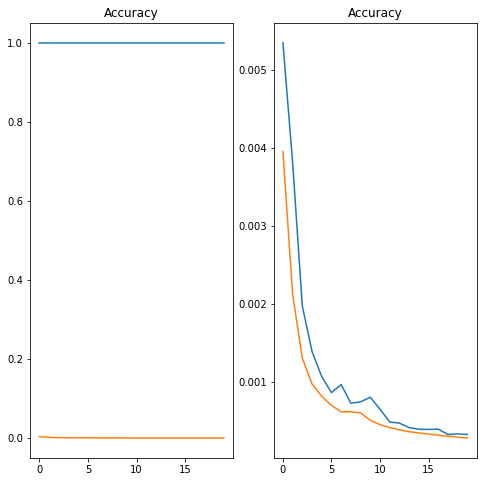

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation Loss')
plt.title('Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation Loss')
plt.title('Accuracy')

In [25]:
image = "Goku.jpg"
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
image_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(image_arr,0)

In [26]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [27]:
Score = tf.nn.softmax(predict)

In [28]:
print('Character in image is {} with the accuracy of {:.2f}%'.format(data_cat[np.argmax(Score)], np.max(Score) * 100))


Character in image is Goku with the accuracy of 100.00%


In [29]:
#Saving the model
model.save("Anime Character recognition Final Project.keras")